# Final Project

### Project Purpose
use listing and reviews of Airbnb to explore customer experience of using Airbnb service at LA. 

### Project Outline
1. Data exploratory of LA Airbnb usage at LA with 10 basic questions
2. Further Discussion of Super host and non-Super host
3. Business Inght

### Data Source:
insidearibnb.com[http://insideairbnb.com/get-the-data.html]

## Part 1 Data Explotary

### Topic 1: How many unique listings are there in the LA dataset? How many unique hosts are there?

1.Number of unique listings =43763

2.Number of unique hosts=26730

In [16]:
import pandas as pd
import numpy as np

# import data from listings.csv
listings=pd.read_csv("./listings.csv")
num_unique_listings=0
num_unique_hosts=0
num_unique_listings=listings["id"].nunique()
num_unique_hosts=listings["host_id"].nunique()
[num_unique_listings,num_unique_hosts]

[43763, 26730]

### Topic 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? 

The mean, median, standard deviation, minimum and maximum of the number of listings per host in LA:

(mean: 1.637224, median: 1.000000, std: 2.497282, min:1, max:152)

In [17]:
import pandas as pd
import numpy as np
listings=pd.read_csv("./listings.csv")
# first method: using calculated_host_listings_count to solve the problem
hosts=listings.loc[:,["host_id","calculated_host_listings_count"]]
    # drop the duplicates of listings in each calculated_host_listings_count
hosts=hosts.drop_duplicates(keep="first")
hosts["calculated_host_listings_count"].agg([np.mean,np.std,np.min,np.max])

# second method: using listing_id to solve the problem
hosts=listings.loc[:,["host_id","id"]]
    # drop the duplicates of listings in each calculated_host_listings_count
hosts=hosts.drop_duplicates(keep="first")
    # group the data by host_id and count their listing id
hosts = hosts.groupby(by=["host_id"])["id"].count()
hosts = hosts.to_frame().reset_index()
hosts["id"].agg([np.mean,np.median,np.std,np.min,np.max])

mean        1.637224
median      1.000000
std         2.497282
amin        1.000000
amax      152.000000
Name: id, dtype: float64

### Topic 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?

The average and standard deviation number of listings for a super host: (mean: 1.753056, std:1.902281) 

The average and standard deviation number of listings for a non-super host: (mean: 1.603263, std:2.646289) 

Super hosts have more listings than non-super hosts on average.

In [18]:
import pandas as pd
import numpy as np
listings=pd.read_csv("./listings.csv")
# select the columns that needed
hosts_sn=listings.loc[:,["host_id","host_is_superhost","calculated_host_listings_count"]]
# drop duplicates
hosts_sn=hosts_sn.drop_duplicates(keep="first")
# select the columns for this question
hosts_sn=hosts_sn.loc[:,["host_is_superhost","calculated_host_listings_count"]]
# group the data by "host_is_superhost" and calculate the mean and standard deviation of the listings
hosts_sn.groupby(by=["host_is_superhost"])["calculated_host_listings_count"].agg([np.mean,np.std])

,mean,std
host_is_superhost,,
f,1.603263,2.646289
t,1.753056,1.902281


### Topic 4: What are the unique types of host verifications are there?

There are 20 unique types of host verifications("None" and empty string are not treated as a type).

('email', 'phone', 'facebook', 'reviews', 'kba', 'jumio', 'government_id', 'offline_government_id', 'selfie', 'identity_manual',

'work_email', 'google', 'manual_online', 'manual_offline', 'sent_id', 'sesame', 'sesame_offline', 'photographer', 'zhima_selfie', 'weibo')

In [20]:
import pandas as pd
import numpy as np
listings=pd.read_csv("./listings.csv")
# select the columns we need for this question
verifications=listings.loc[:,["host_id","host_verifications"]]
# drop duplicates
verifications=verifications.drop_duplicates(keep="first")
# change the format of the "host_verification" into seperate words(String)
t=verifications["host_verifications"].str.strip("[").str.strip("]").str.replace("'","").str.replace(",","").str.split(" ")
# build a dictionary called text to hold the words and their frequency
text={}
for i in t:
    for j in i:
        if text.get(j,"None")=="None":
            if j!="" and j!="None":
                text[j]=1
len(text)
text

{'email': 1,
 'phone': 1,
 'facebook': 1,
 'reviews': 1,
 'kba': 1,
 'jumio': 1,
 'government_id': 1,
 'offline_government_id': 1,
 'selfie': 1,
 'identity_manual': 1,
 'work_email': 1,
 'google': 1,
 'manual_online': 1,
 'manual_offline': 1,
 'sent_id': 1,
 'sesame': 1,
 'sesame_offline': 1,
 'photographer': 1,
 'zhima_selfie': 1,
 'weibo': 1}

### Topic 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?

The five most popular verification types of hosts are phone, email, reviews, government_id and jumio. The percent of hosts is shown as below:

1.phone: 99.3752%

2.email:93.5391%

3.reviews:74.2275%

4.government_id=46.4983%

5.jumio=45.1740%

In [21]:
import pandas as pd
import numpy as np
listings=pd.read_csv("./listings.csv")

# select the columns we need for this question
verifications=listings.loc[:,["host_id","host_verifications"]]
# drop duplicates
verifications=verifications.drop_duplicates(keep="first")
# change the format of the "host_verification" into seperate words(String)
t=verifications["host_verifications"].str.strip("[").str.strip("]").str.replace("'","").str.replace(",","").str.split(" ")
# get the dataframe for the words and its frequency
flat=[j for i in t for j in i]
v_df = pd.DataFrame({'Verification':flat})
v_rank=v_df["Verification"].value_counts()
# calculate the percentage of hosts verify that type
v_rank[0:5]/listings["host_id"].nunique()

phone            0.993752
email            0.935391
reviews          0.742275
government_id    0.464983
jumio            0.451740
Name: Verification, dtype: float64

### Topic 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2019 to 03/01/2019 (inclusive)? 

The mean, standard deviation of the average price of a listing in LA from 2019-01-01 to 2019-03-01 is (mean: 213.240917, std: 577.396135).

In [22]:
# You need to provide the code to answer the previous quesiton
# import the package and the dataframe(calendar.csv) we need
import pandas as pd
import numpy as np
calendar=pd.read_csv("./calendar.csv")

# format the date column
calendar["Date"]=pd.to_datetime(calendar["date"])
# format the price column to make it to the float type
calendar["Price"]=calendar["price"].str.strip("$").str.replace(",","").apply(lambda x: float(x))
# select the time matchs this problem
three_months=calendar.loc[(calendar["Date"]<="2019-03-01") & (calendar["Date"]>="2019-01-01") & (calendar["available"]=="t"),["listing_id","Price"]]
# group the data by listing_id and calculate the average price for each listing_id
tma=three_months.groupby(by=["listing_id"]).apply(lambda x: pd.Series({"AvgPrice":x["Price"].mean()}))
# calculate the mean and std of the average price of each listing
tma["AvgPrice"].agg([np.mean,np.std])

mean    213.240917
std     577.396135
Name: AvgPrice, dtype: float64

### Topic 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?

In Jan, 2016:
('great', 6766),
 ('stay', 5751),
 ('place', 5391),
 ('location', 3417),
 ('clean', 3345),
 ('house', 3315),
 ('us', 3226),
 ('host', 2997),
 ('would', 2975),
 ('nice', 2957)
 
 In March,2017:
 ('great', 15737),
 ('place', 14716),
 ('stay', 11957),
 ('location', 7639),
 ('clean', 6985),
 ('nice', 5867),
 ('host', 5832),
 ('would', 5794),
 ('house', 4880),
 ('comfortable', 4785)
 
 In April 2018:
 ('great', 25352),
 ('place', 24945),
 ('stay', 19570),
 ('location', 13733),
 ('clean', 12130),
 ('would', 9841),
 ('host', 9458),
 ('nice', 9169),
 ('house', 7164),
 ('la', 7029)

In [23]:
import pandas as pd
import numpy as np
reviews=pd.read_csv("./reviews.csv")

# clean data and find the right time
reviews["date"] = pd.to_datetime(reviews["date"])
reviews_7 = reviews[(reviews["date"]>="2016-01-01")&(reviews["date"]<="2016-01-31")]
reviews_7.reset_index()

# NTLK
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','-','--',').','’']) # remove it if you need punctuation 

# function to remove the punctuation and numbers
def Remove_punc_num(sentence):
    if type(sentence)==str:
        # remove punctuation
        after_remove = [i for i in wordpunct_tokenize(sentence.lower()) if i not in stop_words]
        after_remove_punc = [''.join(c for c in s if c not in string.punctuation) for s in after_remove]
        after_remove_punc = [s for s in after_remove_punc if s]
        # remove numbers
        after_remove_num = [i for i in after_remove_punc if not i.isdigit()]
        return after_remove_num
reviews_7.loc[:,"comments"] = reviews_7.loc[:,"comments"].apply(Remove_punc_num)
reviews_7 = reviews_7.reset_index()

# most popular ten words
# function to get a dictionary called "word_count" to hold the words and their corresponding frequency
def Word_count(dataframe):
    word_count = {}
    for j in range(dataframe.shape[0]):
        word = dataframe.loc[:,"comments"][j]
        if word != None:
            for i in word:
                if i in word_count.keys():
                    word_count[i] = word_count[i] + 1
                else:
                    word_count[i]=1
    return word_count

# put the result into a dataframe called "sorted_word_count1"
sorted_word_count = sorted(Word_count(reviews_7).items(), key=lambda x: x[1],reverse=True)
sorted_word_count1 = sorted_word_count[0:10]
sorted_word_count1 = pd.DataFrame(list(sorted_word_count1))
sorted_word_count1

## 2. 2017 March (using the functions built before to calculate the word and frequency)
## clean data and find the right time
reviews_7 = reviews[(reviews["date"]>="2017-03-01")&(reviews["date"]<="2017-03-31")]
reviews_7.reset_index()

reviews_7["comments"] = reviews_7["comments"].apply(Remove_punc_num)
reviews_7 = reviews_7.reset_index()
## most popular ten words
sorted_word_count = sorted(Word_count(reviews_7).items(), key=lambda x: x[1],reverse=True)
sorted_word_count2 = sorted_word_count[0:10]
sorted_word_count2 = pd.DataFrame(list(sorted_word_count2))

## 3. 2018 April (using the functions built before to calculate the word and frequency)
# clean data and find the right time
reviews_7 = reviews[(reviews["date"]>="2018-04-01")&(reviews["date"]<="2018-04-30")]
reviews_7.reset_index()
reviews_7["comments"] = reviews_7["comments"].apply(Remove_punc_num)
reviews_7 = reviews_7.reset_index()
# most popular ten words
sorted_word_count = sorted(Word_count(reviews_7).items(), key=lambda x: x[1],reverse=True)
sorted_word_count3 = sorted_word_count[0:10]
sorted_word_count3 = pd.DataFrame(list(sorted_word_count3))

# combine into one dataframe
result = pd.concat([sorted_word_count1, sorted_word_count2,sorted_word_count3], axis=1)
result.columns = ['201601','keywords1','201703','keywords2','201804','keywords3']
result

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

,201601,keywords1,201703,keywords2,201804,keywords3
0,great,6766,great,15737,great,25352
1,stay,5751,place,14716,place,24945
2,place,5391,stay,11957,stay,19570
3,location,3417,location,7639,location,13733
4,clean,3345,clean,6985,clean,12130
5,house,3315,nice,5867,would,9841
6,us,3226,host,5832,host,9458
7,host,2997,would,5794,nice,9169
8,would,2975,house,4880,house,7164
9,nice,2957,comfortable,4785,la,7029


### Topic 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2019-01-01 to 2019-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes?

The five zipcodes that have the highest average listing price and has at least 30 listings are 90210,91302,90265,90077 and 91436.

The corresponding listing prices are 1353.793875, 1348.436866, 1075.390163, 948.524392 ad 682.224427.

The corresponding number of active listings are 297.0, 53.0, 473.0, 66.0, 64.0

The number of hosts in these top five zipcodes are 209.0, 49.0, 320.0, 56.0, 51.0

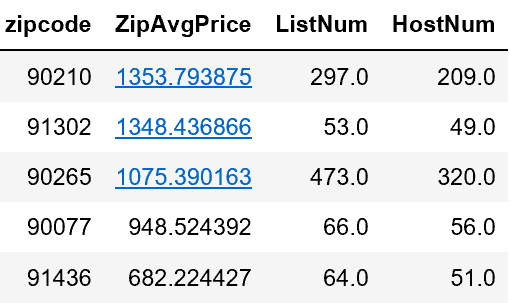

In [24]:
# You need to provide the code to answer the previous quesiton
# import the package and the dataframe(calendar.csv & listings.csv) we need
import pandas as pd
import numpy as np
listings=pd.read_csv("./listings.csv")
calendar=pd.read_csv("./calendar.csv")

# format the date column
calendar["Date"]=pd.to_datetime(calendar["date"])
# format the price column to make it to the float type
calendar["Price"]=calendar["price"].str.strip("$").str.replace(",","").apply(lambda x: float(x))
# select the time matchs this problem
one_month=calendar.loc[(calendar["Date"]<="2019-02-01") & (calendar["Date"]>="2019-01-01") & (calendar["available"]=="t"),["listing_id","Price"]]
# group the data by the listing_id and calculate the average price for each listing_id
list_id_price=one_month.groupby(by=["listing_id"]).apply(lambda x: pd.Series({"AvgPrice":x["Price"].mean()}))
list_id_price=list_id_price.reset_index(drop=False)
# filter the listing_id, zipcode and host_id
zipcode=listings.loc[:,["id","zipcode","host_id"]]
# merge the data we filter and merge with the average price for each listing_id
zip_price=list_id_price.merge(zipcode,how="left",left_on="listing_id",right_on="id").loc[:,["id","zipcode","AvgPrice","host_id"]]
# group by the new data frame by zipcode and calculate its average price 
zip_price=zip_price.groupby(by=["zipcode"]).apply(lambda x: pd.Series({"ZipAvgPrice":x["AvgPrice"].mean(),"ListNum":x["id"].nunique(),"HostNum":x["host_id"].nunique()})).reset_index(drop=False)
# filter the number of listings is at least 30
zip_price=zip_price.loc[zip_price["ListNum"]>=30,:]
# sort the data by its prices
zip_price.sort_values(by=["ZipAvgPrice"],inplace=True,ascending=False)
zip_price.reset_index(drop=True)
zip_price.head(5)

,zipcode,ZipAvgPrice,ListNum,HostNum
74,90210,1353.793875,297.0,209.0
192,91302,1348.436866,53.0,49.0
94,90265,1075.390163,473.0,320.0
71,90077,948.524392,66.0,56.0
232,91436,682.224427,64.0,51.0


### Topic 9: Focusing on the data from 2019-01-01 to 2019-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). 

The five zipcodes are 90210, 90069, 91302, 91325 and 90211. The corresponsing listing prices are 17.966450, 15.566193, 15.282956, 12.948061 and 8.634384.

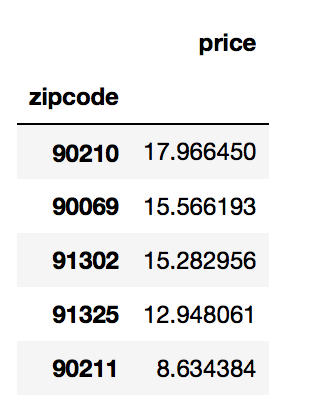

In [25]:
import pandas as pd
import numpy as np


listings=pd.read_csv("./listings.csv")
calendar=pd.read_csv("./calendar.csv", parse_dates = ['date'])

#filter out the dates required in this question
calendar = calendar.loc[(calendar['date'] >= '2019-1-1')& (calendar['date'] <= '2019-4-1')& (calendar['available'] == 't'),:]
#drop the duplicate columns
listings = listings.loc[:,['id','zipcode']].drop_duplicates(keep='first')
#merge 2 tables:listings+calendar
question_9 = calendar.merge(listings, how = 'left', left_on = 'listing_id', right_on = 'id')
question_9['price']=question_9['price'].map(lambda x: float(x.strip('$').replace(",","")))
#filter out zipcodes that have more than 30 listings
question_9 = question_9.groupby(by = 'zipcode').filter(lambda x: x['id'].nunique() >= 30)
#change days into weekdays_name and create a column to illustrate if this date is weekday or weekend
question_9['days'] = question_9['date'].dt.weekday_name
def weekends(x):
    if x == 'Sunday' or x == 'Saturday':
        y = 1
    else:
        y = 0
    return y
question_9['if_weekend'] = question_9['days'].apply(weekends)
#create a series which contains the average price of weekdays
weekdays = question_9.loc[question_9['if_weekend'] == 0].groupby(by = 'zipcode').price.mean()
#create a series which contains the average price of weekends
weekends = question_9.loc[question_9['if_weekend'] == 1].groupby(by = 'zipcode').price.mean()
#put two series together, calculate the difference and create a dataframe
question_9 = pd.DataFrame(abs(weekdays-weekends))
question_9.sort_values('price', ascending = False).head(5)

,price
zipcode,
90210,17.966450
90069,15.566193
91302,15.282956
91325,12.948061
90211,8.634384


### Topic 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2019-01-01 to 2019-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2019-01-01 to 2019-04-01?

The average and standard deviation of the daily total capacity at Airbnb LA is 51105.835165 and 1387.175342. 

The average and standard deviation of the daily price per bed at Airbnb LA is 106.003707 and 2.589225.

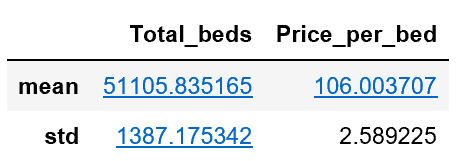

In [19]:
# You need to provide the code to answer the previous quesiton
# import the package and the dataframe(calendar.csv & listings.csv) we need
import pandas as pd
import numpy as np
listings=pd.read_csv("./listings.csv")
calendar=pd.read_csv("./calendar.csv")

# format the date column
calendar["Date"]=pd.to_datetime(calendar["date"])
# format the price column to make it to the float type
calendar["Price"]=calendar["price"].str.strip("$").str.replace(",","").apply(lambda x: float(x))
# select the time matchs this problem
df_cal=calendar.loc[(calendar["Date"]<="2019-04-01") & (calendar["Date"]>="2019-01-01") & (calendar["available"]=="t"),["Date","listing_id","Price"]]
df_cal=df_cal.reset_index(drop=True)
# select the variables we need for this problem: id and beds
df_bed=listings.loc[:,["id","beds"]]
# merge the listing and the calendars after filtering 
df_beds=df_cal.merge(df_bed,how="left",left_on="listing_id",right_on="id")
# group by the data by Date and calculate the number of the total beds
df_1=df_beds.groupby(by="Date").apply(lambda x: pd.Series({"Total_beds":x["beds"].sum(),"Total_Price":x["Price"].sum()})).reset_index(drop=False)
# calculate the price per bed
df_1["Price_per_bed"]=df_1["Total_Price"]/df_1["Total_beds"]
# calculate the corresponding mean and standard deviation
df_1[["Total_beds","Price_per_bed"]].agg([np.mean,np.std])

,Total_beds,Price_per_bed
mean,51105.835165,106.003707
std,1387.175342,2.589225


## Part 2 : Super host vs. Non-super host

### Question 1:
**What's the difference between the average overall ratings of super hosts and that of non-super hosts? What's the difference between the average number of reviews of super hosts and that of non-super hosts?**

As we expected, the super hosts have higher average overall ratings and average number of reviews than non-super hosts. This result shows that reviews are important to the hosts' reputation; all hosts should do better to get more reviews of their houses.
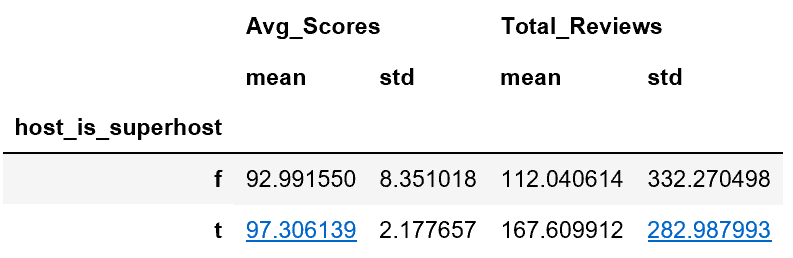

In [14]:
import pandas as pd
import numpy as np
listings=pd.read_csv("./listings.csv")
# filter the variables we need for this problem
df_rating=listings.loc[:,["host_id","host_is_superhost","review_scores_rating","number_of_reviews"]]
# group the data by the host id and calculate the mean of review ratings scores and the total number of it
df=df_rating.groupby(by=["host_id"]).apply(lambda x: pd.Series({"Avg_Scores":x["review_scores_rating"].mean(),"Total_Reviews":x["number_of_reviews"].sum()}))
df.reset_index(drop=False)
# filter the host id and the host_is_superhost
df_super=df_rating.loc[:,["host_id","host_is_superhost"]]
# merge the dataframes together and group by "host_is_superhost" to calculate their mean and standard deviation
df_result=df.merge(df_super,how="left",on="host_id")
df_result=df_result.groupby(by=["host_is_superhost"])[["Avg_Scores","Total_Reviews"]].agg([np.mean,np.std])
df_result

Avg_Scores           Total_Reviews            
                        mean       std          mean         std
host_is_superhost                                               
f                  92.991550  8.351018    112.040614  332.270498
t                  97.306139  2.177657    167.609912  282.987993

In [26]:
***plot of question 1***
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, (ax0,ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
data_to_plot=df_result.reset_index(drop=False)
data_to_plot[['host_is_superhost','Avg_Scores']].plot(kind = 'bar', x= 'host_is_superhost', y = 'Avg_Scores', ax =ax0)
ax0.set_title("Average Scores Super host VS Non-super host")
ax0.set_xlabel('Host is Superhost')
ax0.set_ylabel('Average Scores')
data_to_plot[['host_is_superhost','Total_Reviews']].plot(kind = 'bar', x= 'host_is_superhost', y = 'Total_Reviews', ax =ax1)
ax1.set_title("Average Total Reviews Super host VS Non-super host")
ax1.set_xlabel('Host is Superhost')
ax1.set_ylabel('Average Total Reviews')

SyntaxError: invalid syntax (<ipython-input-26-1eb7dcd51bcb>, line 1)

### Question 2
**What's the difference between the average of each specified ratings of super hosts and that of non-super hosts? Which aspect can non-super hosts improve?**

From the answer of the codes, we get a dataframe showing the average ratings of every aspect when the guests book airbnb. It is obvious that super hosts have higher ratings than non-super hosts in every aspect. 

We then plot the difference to see the gap of every aspect of ratings. Apparently, "cleaness", "value" and "accuracy" have the largest gap between super hosts and non-super hosts, which means that for non-super hosts, improving their cleaness of the house, showing more valuable part of the house and describing the house accurately may help them improve their ratings. 

In [17]:
# Your code to answer Question 2
# import the package and the dataframe(listings.csv) we need
import pandas as pd
import numpy as np
listings = pd.read_csv("./listings.csv")

# select the columns that needed
listings_p2_3 = listings.loc[:,["host_id","host_is_superhost","review_scores_rating","review_scores_accuracy",\
                                "review_scores_cleanliness","review_scores_checkin",\
                                "review_scores_communication","review_scores_location","review_scores_value"]]
# calculate mean by each host_id
listings_p2_3 = listings_p2_3.groupby(by=["host_id","host_is_superhost"])["review_scores_accuracy",\
                                                                          "review_scores_cleanliness",\
                                                                          "review_scores_checkin",\
                                                                          "review_scores_communication",\
                                                                          "review_scores_location",\
                                                                          "review_scores_value"].mean()
                                                                          
# calculate mean by superhost or not
listings_p2_3 = listings_p2_3.groupby(by = ["host_is_superhost"])["review_scores_accuracy",\
                                                                          "review_scores_cleanliness",\
                                                                          "review_scores_checkin",\
                                                                          "review_scores_communication",\
                                                                          "review_scores_location",\
                                                                          "review_scores_value"].agg([np.mean])
                                                                          
listings_p2_3=listings_p2_3.transpose()
listings_p2_3["Diff"]=listings_p2_3["t"]-listings_p2_3["f"]
listings_p2_3

,host_is_superhost,f,t,Diff
review_scores_accuracy,mean,9.614102,9.935446,0.321344
review_scores_cleanliness,mean,9.351743,9.820995,0.469252
review_scores_checkin,mean,9.767319,9.968550,0.201231
review_scores_communication,mean,9.755420,9.972418,0.216999
review_scores_location,mean,9.653764,9.841306,0.187542
review_scores_value,mean,9.466106,9.822138,0.356032


Text(0,0.5,'Difference of Average Scores')

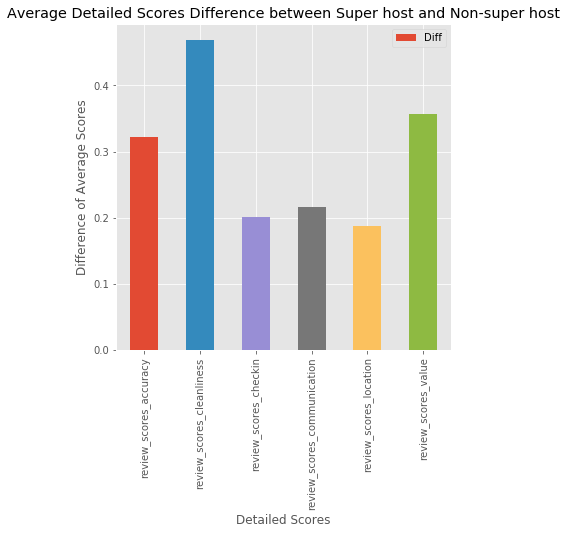

In [18]:
***plot of question 2***
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (6,6))
data_to_plot=listings_p2_3.reset_index(drop=False)
data_to_plot[['level_0','Diff']].plot(kind = 'bar', x='level_0',y = 'Diff', ax=ax)
ax.set_title("Average Detailed Scores Difference between Super host and Non-super host")
ax.set_xlabel('Detailed Scores')
ax.set_ylabel('Difference of Average Scores')

### Question 3
**What's the most common words in the reviews of super hosts and non-super hosts? What is the top 20 common key words in reviews for super host and non super host in LA in 2018-05-01 - 2018-11-01(past six months)?**

The most common words in the reviews of super hosts is "place, greate, stay, location, clean, would, host, nice, house, LA, everything, recommend, comfortable, home, perfect, definitely, us, space, really, room"

The most common words in the reviews of non-super hosts is "place, greate, stay, location, clean, nice, host, would, LA, house, good, room, everything, recommend, apartment, comfortable, really, definitely, us, close"

Generally speaking, most key words are same which means that most guests pay attention to the same aspects when they book airbnb. For example, both of the top 20 key words have "location, nice, everything, comfortale", which means the location is the top priority to the guests. For the guests, being comfortable in the house is what they want. Hence, Airbnb can encourage more hosts to create a comfortable environment in the house, and also encourage more people whose house's transportation is convenient to join Airbnb. 

Specifically, super hosts and non-super hosts have exclusive key words which can reflect guests' preference. Among the key words of super hosts, words like "home, space" reflect that superhosts create a comfortable home atmosphere that makes guests feel like they are at home. Superhosts also provide spacious space for the guests, making their airbnb more popular. For non-super hosts, most guests care about room and apartment. Also "close" shows that the guests living in accomodations of non-super hosts pay attention to the transportation. 

The result in question 3 matchs the result of the question 2. For Airbnb, it should encourage more people whose house has convenient transportation to join Airbnb. For superhosts, to attract more guests, they should create a comfortable home atmosphere. For non-super hosts, they should not only create a comfortable home atmosphere, but also give more suggestions on ways of transportation to the guests.

In [23]:
import pandas as pd
import numpy as np
listings = pd.read_csv("./listings.csv")
reviews = pd.read_csv("./reviews.csv")

# clean data and find the right time
reviews["date"] = pd.to_datetime(reviews["date"])
reviews_2_3 = reviews[(reviews["date"]>="2018-05-01")&(reviews["date"]<="2018-11-01")]
reviews_2_3.reset_index()

# merge with listings to match the superhost
reviews_2_3 = reviews_2_3.merge(listings,how = "left", left_on = "listing_id", right_on = "id")
reviews_2_3 = reviews_2_3.loc[:,["listing_id","host_is_superhost","date","comments"]]

# two dataframes: one is for superhost, another is for non superhost
superhost_comment = reviews_2_3.loc[reviews_2_3.host_is_superhost == "t",]
nonsuperhost_comment = reviews_2_3.loc[reviews_2_3.host_is_superhost == "f",]

# NTLK
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','-','--',').','’']) # remove it if you need punctuation 

def Remove_punc_num(sentence):
    if type(sentence)==str:
        # remove punctuation
        after_remove = [i for i in wordpunct_tokenize(sentence.lower()) if i not in stop_words]
        after_remove_punc = [''.join(c for c in s if c not in string.punctuation) for s in after_remove]
        after_remove_punc = [s for s in after_remove_punc if s]
        # remove numbers
        after_remove_num = [i for i in after_remove_punc if not i.isdigit()]
        return after_remove_num

# superhost top 20 key words
superhost_comment.loc[:,"comments"] = superhost_comment.loc[:,"comments"].apply(Remove_punc_num)
superhost_comment = superhost_comment.reset_index()

word_count = {}
for j in range(superhost_comment.shape[0]):
    word = superhost_comment.loc[:,"comments"][j]
    if word != None:
        for i in word:
            if i in word_count.keys():
                word_count[i] = word_count[i] + 1
            else:
                word_count[i]=1
                
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1],reverse=True)
superhost_words = sorted_word_count[0:20]

# nonsuperhost top 20 key words
nonsuperhost_comment.loc[:,"comments"] = nonsuperhost_comment.loc[:,"comments"].apply(Remove_punc_num)
nonsuperhost_comment = nonsuperhost_comment.reset_index()

word_count = {}
for j in range(nonsuperhost_comment.shape[0]):
    word = nonsuperhost_comment.loc[:,"comments"][j]
    if word != None:
        for i in word:
            if i in word_count.keys():
                word_count[i] = word_count[i] + 1
            else:
                word_count[i]=1
                
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1],reverse=True)
nonsuperhost_words = sorted_word_count[0:20]

# combine the answer
superhost_words_1 = pd.DataFrame(list(superhost_words))
nonsuperhost_words_1 = pd.DataFrame(list(nonsuperhost_words))
result = pd.concat([superhost_words_1, nonsuperhost_words_1], axis=1)
result.columns = ['superhost', 'times_super','non_superhost','times_non_super']
result

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,superhost,times_super,non_superhost,times_non_super
0,place,80507,place,75420
1,great,79255,great,74195
2,stay,62950,stay,54913
3,location,41157,location,43013
4,clean,40487,clean,35309
5,would,30625,nice,30816
6,host,30033,host,30197
7,nice,29524,would,27814
8,house,24701,la,20793
9,la,24473,house,20791


### Question 4
**Among top 10 areas (sorted by zip code) with the largest number of listings, what are the percentage of superhost?**

The top 10 areas (sorted by zip code) with the largest number of listings, and the percentage of superhost are as follow.

zipcode: ['90291','90028','90046','90026','90036','90068','90066','90292','90027','90025']  
per_of_superhost:  [0.305395, 0.138759, 0.206587, 0.355111, 0.191743, 0.266733, 0.304502, 0.230867, 0.206266, 0.221925]

In this question, we select top 10 areas with the largest number of listings, and then calcluate the percentage of superhost in each area. After we make the plot, we find that among these 10 areas, the area with zipcode '90028' has the lowest percentage of superhost. This area is the area where the famous landmark "Walk of Fame" is located. We know the fact that visitors tend to choose the listing that is close to the landmarks. To leave the tourists good impressions on accomodations provided by Airbnb, Airbnb should take actions to encourage the hosts who owns the properties near "Walk of Fame" to improve their service.

In [8]:
import pandas as pd
listings = pd.read_csv('./listings.csv')
listing_1 = listings.loc[:, ['host_id','id','zipcode','city','state','host_is_superhost',]]

#change the values of column 'host_is_superhost' from string to into 0/1
listing_1['if_superhost'] = listing_1['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

#calculate number of listing and percentage of superhost with each zipcode area
question_4 = listing_1.groupby(by=['zipcode']).apply(lambda x: pd.Series({'num_of_listing':x['id'].nunique(), 'per_of_superhost': sum(x['if_superhost'])/sum(x['if_superhost'].value_counts())}))

#sort the result in a descending way to see the top 10 areas with the largest number of listings
top_5_area_with_most_perc_of_superhost = question_4.sort_values(by=['num_of_listing','per_of_superhost'], ascending=[False,False])

#visualize the result
top_5_area_with_most_perc_of_superhost = top_5_area_with_most_perc_of_superhost.reset_index()
top_5_area_with_most_perc_of_superhost.head(10)


,zipcode,num_of_listing,per_of_superhost
0,90291,2243.0,0.305395
1,90028,1708.0,0.138759
2,90046,1670.0,0.206587
3,90026,1301.0,0.355111
4,90036,1090.0,0.191743
5,90068,1001.0,0.266733
6,90066,844.0,0.304502
7,90292,784.0,0.230867
8,90027,766.0,0.206266
9,90025,748.0,0.221925


Text(0,0.5,'Average listing price-Superhost')

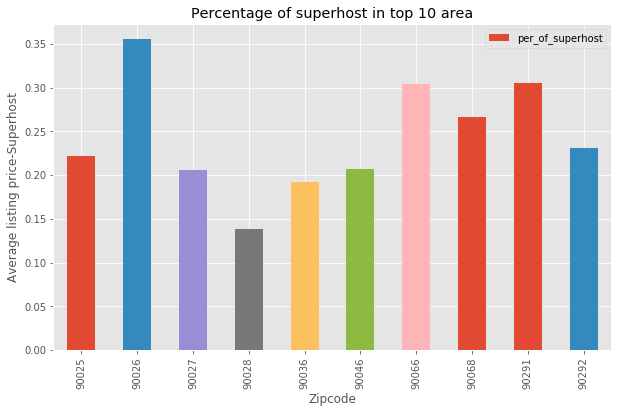

In [9]:
##### Plot of question 4
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize = [10,6])
top_5_area_with_most_perc_of_superhost = top_5_area_with_most_perc_of_superhost.sort_values(by='zipcode', ascending=True)
data_to_plot = top_5_area_with_most_perc_of_superhost.loc[top_5_area_with_most_perc_of_superhost['num_of_listing'] >= 748,:]
data_to_plot[['zipcode','per_of_superhost']].plot(kind = 'bar', x= 'zipcode', y = 'per_of_superhost', ax =ax)
ax.set_title("Percentage of superhost in top 10 area")
ax.set_xlabel('Zipcode')
ax.set_ylabel('Average listing price-Superhost')

### Question 5
**What's the average price of super hosts's listings in the above 10 zipcodes in the first half of the next year(2019)?**

In question 5, we can know the top 10 areas (sorted by zipcode) with the highest average listing price. Among these 10 areas, we can find that West Hollywood (zipcode:90046) has the highest average listing price. When we put the plot of question 4 and question 5 together, we can find that some areas have relatively lower percentage of superhost even though they have higher average listing price (eg: areas with zipcode 90028 and 90046). There is no doubt that people prefer airbnb with lower price and better hosts. If the price of the accomodation is higher while the service of host is worse, people might not choose this place to live in. Therefore, Airbnb could give suggestions to the hosts in these areas on how to improve the service to attract more guests. 

In [29]:
import numpy as np
calendar = pd.read_csv('./calendar.csv')
listing = pd.read_csv('./listings.csv')

calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].apply(lambda value: float(value.strip("$").replace(",", "")) \
                                            if type(value)== str else value)

#filter the listing that is provided from 20190101 to 20190630
calendar = calendar.loc[(calendar['date'] >= '2019-01-01') & (calendar['date'] <= '2019-06-30') &\
                          (calendar['available'] == 't'),:]

#calculate each listing's average price
calendar = calendar.groupby(by = ['listing_id'])['price'].mean()
calendar = calendar.to_frame().reset_index()

#merge dataframe 'calendar' and dataframe 'listing'
mergetable = calendar.merge(listing, how = 'left', left_on = 'listing_id', right_on = 'id')
mergetable_filtered = mergetable.loc[mergetable['host_is_superhost'] == 't',:]

#calculate the average price of each the listings in the top 10 areas with largest number of listings
avg_price_zipcode = mergetable_filtered.groupby(by = ['zipcode']).apply(lambda x: pd.Series({'avg_listing_price':np.mean(x['price_x'])}))
avg_price_zipcode = avg_price_zipcode.reset_index()
avg_price_zipcode_top10 = avg_price_zipcode.loc[avg_price_zipcode['zipcode'].isin(['90291','90028','90046','90026','90036','90068','90066','90292','90027','90025']),:]

#visualize the result
avg_price_zipcode_top10

,zipcode,avg_listing_price
24,90025,174.662714
25,90026,143.601460
26,90027,167.265840
27,90028,148.093311
35,90036,166.367035
45,90046,277.487209
56,90066,142.746725
58,90068,253.326189
91,90291,238.186975
92,90292,258.188556


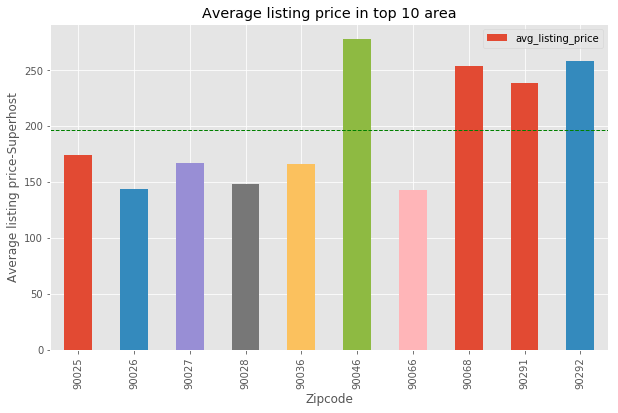

In [34]:
##### Plot of question 5
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize = [10,6])
avg_price_zipcode_top10.plot(kind = 'bar', y = 'avg_listing_price', x= 'zipcode', ax= ax)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Average listing price-Superhost')
ax.set_title("Average listing price in top 10 area")

mean_price = avg_price_zipcode_top10.avg_listing_price.mean()
ax.axhline(y= mean_price, color = 'g', label = 'Average', linestyle = '--', linewidth = 1)

##### Combining plots of question 4 and 5

[Text(0,0.5,'Average listing price-Superhost'),
 Text(0.5,0,'Zipcode'),
 Text(0.5,1,'Average listing price in top 10 area')]

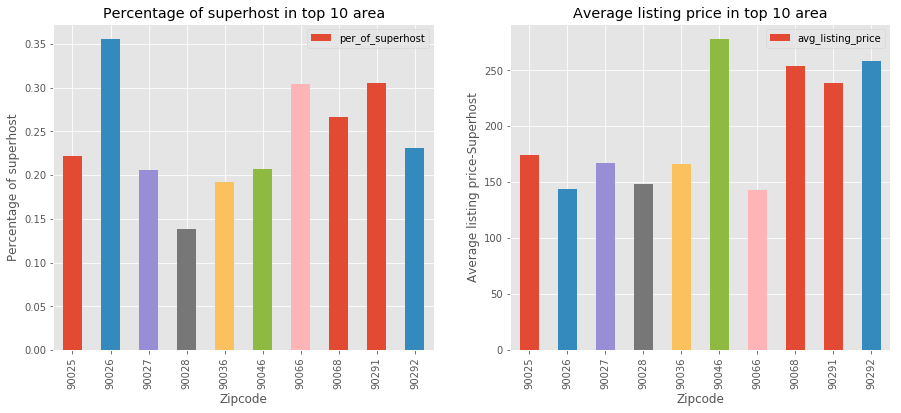

In [36]:
#when we combine 2 plots in question 4 and question 5 together
%matplotlib inline

fig, (ax0,ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

top_5_area_with_most_perc_of_superhost = top_5_area_with_most_perc_of_superhost.sort_values(by='zipcode', ascending=True)
data_to_plot = top_5_area_with_most_perc_of_superhost.loc[top_5_area_with_most_perc_of_superhost['num_of_listing'] >= 748,:]
data_to_plot[['zipcode','per_of_superhost']].plot(kind = 'bar', x= 'zipcode', y = 'per_of_superhost', ax = ax0)
ax0.set(title = "Percentage of superhost in top 10 area", xlabel = "Zipcode", ylabel = 'Percentage of superhost')

avg_price_zipcode_top10.plot(kind = 'bar', y = 'avg_listing_price', x= 'zipcode', ax= ax1)
ax1.set(title = "Average listing price in top 10 area", xlabel = 'Zipcode', ylabel = 'Average listing price-Superhost')

## Part 3: Business Insights

We focus on analyzing data related to superhost. After analyzing the data, we can find that:  
(1) Superhosts get what they deserve. They receive higher ratings, so they get the honour of 'superhost'.  
(2) For non-superhosts, they should improve their cleaness of the house, show more valuable parts of the house and describe the house accurately to help them improve their ratings.  
(3) For Airbnb, it should encourage more people whose house has convenient transportation to join Airbnb. For non-super hosts, they should not only create a comfortable home atmosphere, but also give more suggestions on ways of transportation to the guests.
(4) Airbnb could give suggestions to the hosts in the area, where the percentage of superhost is low, on how to improve the service to attract more guests.  

All in all, Airbnb should encourage the hosts to improve their service to statisfy more guests, which beniefit not only the hosts but also Airbnb itself in the long run.